# DOTA 2 Hero Recommendation Model 

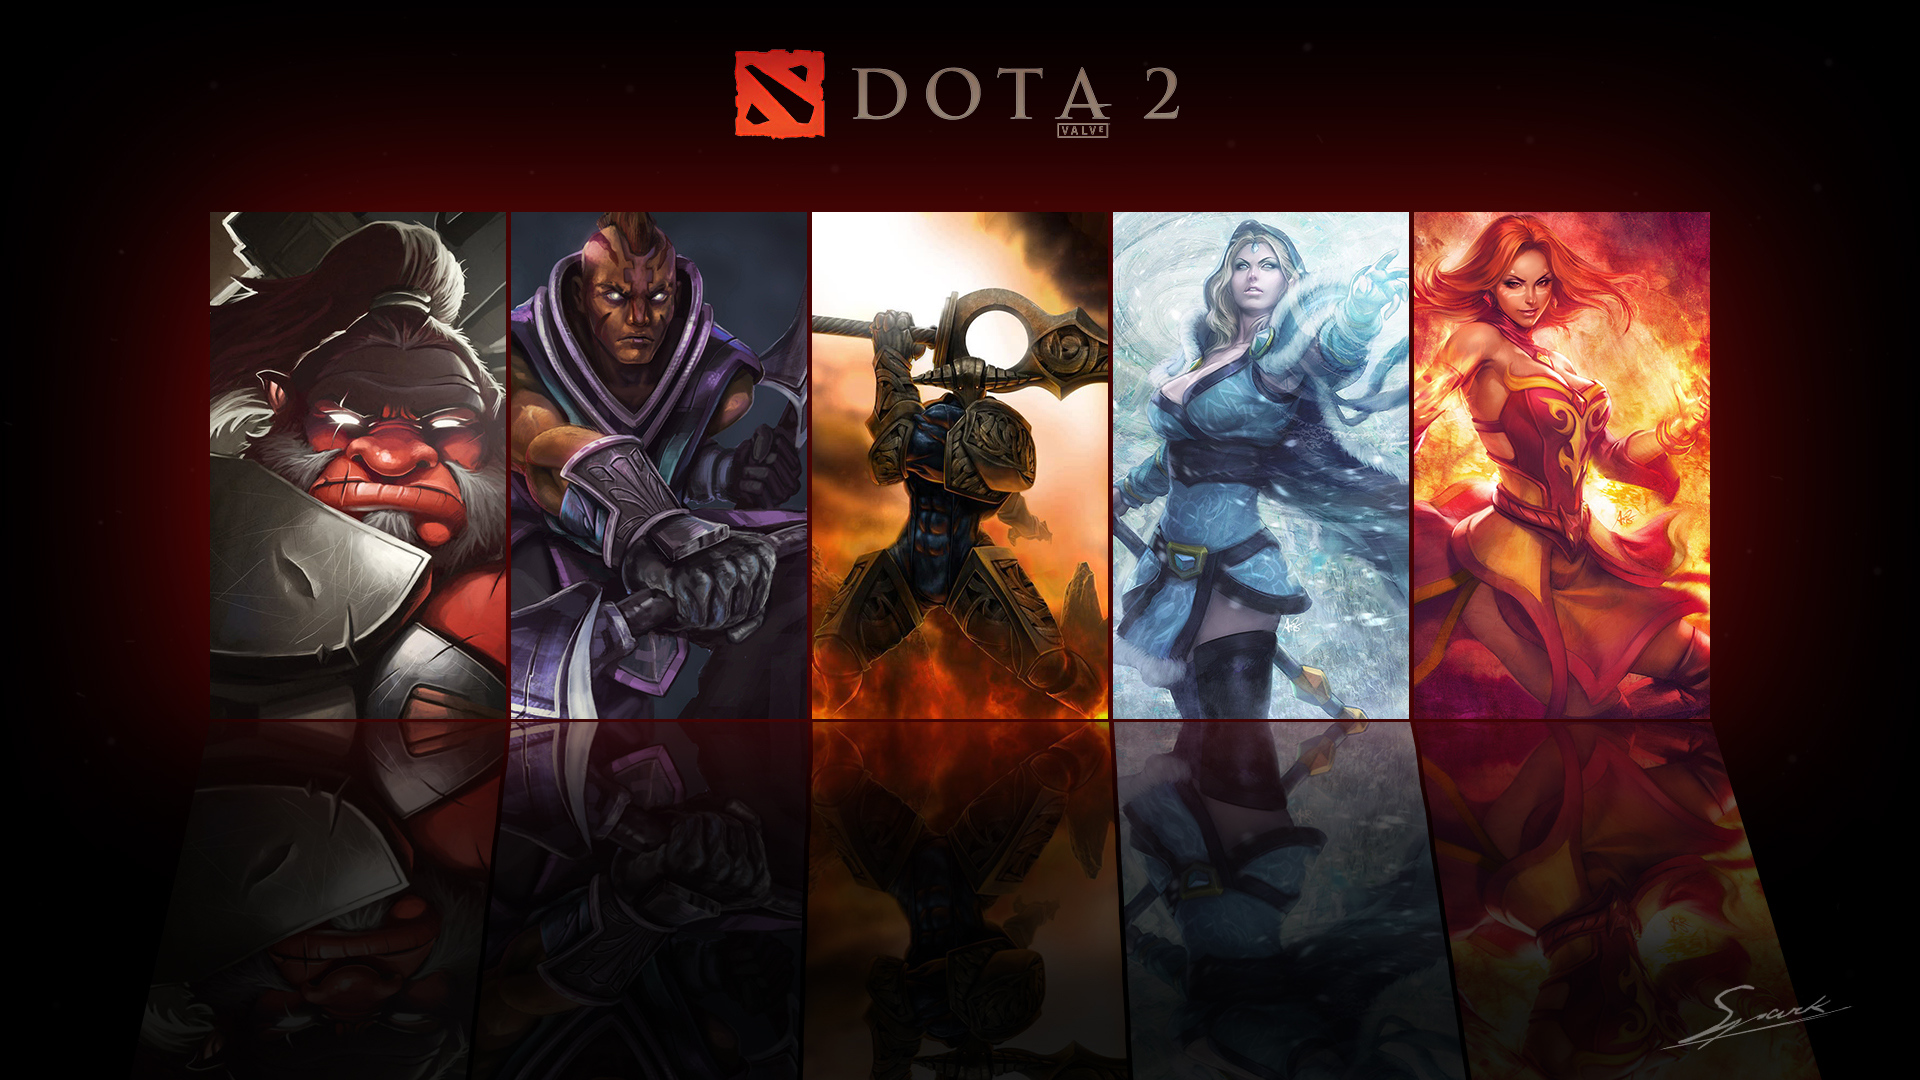

In [98]:
from IPython.display import Image
Image(filename='DOTA_2_Anti_Mage___437365.jpg',width=800, height=200)

## Importing packages

In [99]:
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import json
from progressbar import ProgressBar
from matplotlib.figure import Figure
from IPython.core.debugger import set_trace
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from  joblib import dump, load
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm
import xgboost as xgb

## Importing data

In [100]:
match = pd.read_csv("match.csv")
match.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [101]:
data = pd.read_csv("players.csv")

In [102]:
data.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


## Feature engineering and Cleaning

In [103]:
names_heroes=['hero0','hero1','hero2','hero3','hero4','hero5','hero6','hero7','hero8','hero9']
names=pd.DataFrame(columns=names_heroes)
names.head()

,hero0,hero1,hero2,hero3,hero4,hero5,hero6,hero7,hero8,hero9


In [104]:
#for match in np.arange(0,50000):
    #names.loc[len(names)] = data[data['match_id'] == match]['hero_id'].values.tolist()

In [105]:
names.head()

,hero0,hero1,hero2,hero3,hero4,hero5,hero6,hero7,hero8,hero9


In [106]:
names = pd.read_csv('names.csv')

## Preparing the main dataset 

In [107]:
match_new = pd.read_csv("match.csv")
match_new.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [108]:
main =pd.concat([match_new, names],axis=1)
main =main.dropna()

### Dire vs Radiant 

In [109]:
dire_win=len(main[main['radiant_win']==False])
print("The probability of dire winning "+ str(dire_win/len(main)))

The probability of dire winning 0.48114


In [110]:
radiant_win=len(main[main['radiant_win']==True])
print("The probability of radiant winning "+ str(radiant_win/len(main)))

The probability of radiant winning 0.51886


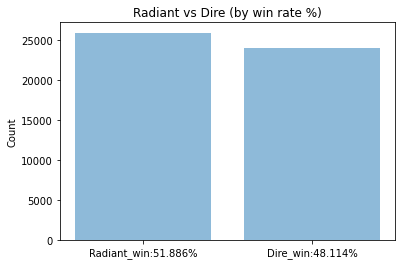

In [111]:
wins = ['Radiant_win:51.886%', 'Dire_win:48.114%']
performance = [0.51886 * len(main), 0.48114 * len(main) ]
plt.bar(wins, performance, align='center', alpha=0.5)
plt.ylabel('Count')
plt.title('Radiant vs Dire (by win rate %)')

plt.show()

In [112]:
main

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,...,hero0,hero1,hero2,hero3,hero4,hero5,hero6,hero7,hero8,hero9
0,0,1446750112,2375,1982,4,3,63,1,22,True,...,86,51,83,11,67,106,102,46,7,73
1,1,1446753078,2582,0,1846,63,0,221,22,False,...,7,82,71,39,21,73,22,5,67,106
2,2,1446764586,2716,256,1972,63,48,190,22,False,...,51,109,9,41,27,38,7,10,12,85
3,3,1446765723,3085,4,1924,51,3,40,22,False,...,50,44,32,26,39,78,19,31,40,47
4,4,1446796385,1887,2047,0,0,63,58,22,True,...,8,39,55,87,69,101,100,22,67,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,...,73,86,21,20,14,32,7,109,35,112
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,...,93,74,100,32,85,36,1,112,60,71
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,...,100,68,75,39,44,28,102,21,9,23
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,...,56,50,2,72,30,46,7,29,44,3


### Getting hero names fro json file

In [113]:
heroesname=[]
for i in range(0,115):
    heroesname.append("empty")
    
fopen=open('heroes.json','r')
heroes=json.load(fopen)
fopen.close()

for i in range(0,len(heroes)):
    heroesname[heroes[i].get('id')]=heroes[i].get('name')

In [114]:
heroesname

['empty',
 'antimage',
 'axe',
 'bane',
 'bloodseeker',
 'crystal_maiden',
 'drow_ranger',
 'earthshaker',
 'juggernaut',
 'mirana',
 'morphling',
 'nevermore',
 'phantom_lancer',
 'puck',
 'pudge',
 'razor',
 'sand_king',
 'storm_spirit',
 'sven',
 'tiny',
 'vengefulspirit',
 'windrunner',
 'zuus',
 'kunkka',
 'empty',
 'lina',
 'lion',
 'shadow_shaman',
 'slardar',
 'tidehunter',
 'witch_doctor',
 'lich',
 'riki',
 'enigma',
 'tinker',
 'sniper',
 'necrolyte',
 'warlock',
 'beastmaster',
 'queenofpain',
 'venomancer',
 'faceless_void',
 'skeleton_king',
 'death_prophet',
 'phantom_assassin',
 'pugna',
 'templar_assassin',
 'viper',
 'luna',
 'dragon_knight',
 'dazzle',
 'rattletrap',
 'leshrac',
 'furion',
 'life_stealer',
 'dark_seer',
 'clinkz',
 'omniknight',
 'enchantress',
 'huskar',
 'night_stalker',
 'broodmother',
 'bounty_hunter',
 'weaver',
 'jakiro',
 'batrider',
 'chen',
 'spectre',
 'ancient_apparition',
 'doom_bringer',
 'ursa',
 'spirit_breaker',
 'gyrocopter',
 'alche

# Implementing machine learning algorithms

In [115]:
enc = OneHotEncoder(handle_unknown='ignore')

In [116]:
team1 = pd.DataFrame(enc.fit_transform(main[['hero0','hero1','hero2','hero3','hero4']]).toarray())
team2 = pd.DataFrame(enc.fit_transform(main[['hero5','hero6','hero7','hero8','hero9']]).toarray())

In [117]:
pca = PCA(n_components=250)
principalComponents1 = pca.fit_transform(team1)
principalDf1 = pd.DataFrame(data = principalComponents1)
principalComponents2 = pca.fit_transform(team2)
principalDf2 = pd.DataFrame(data = principalComponents2)

In [118]:
teams = principalDf1 + principalDf2
y = main['radiant_win']

In [119]:
teams.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.018157,0.083118,0.043272,0.066663,-0.189821,-0.599696,-0.604260,-0.230198,0.150416,0.099145,...,-0.010281,-0.259462,-0.038765,0.191925,-0.057987,0.163999,0.146559,-0.132012,-0.221455,-0.093627
1,-0.135402,-0.031025,0.023734,0.830919,-0.085868,0.062811,0.137404,0.100004,-0.334566,-0.000568,...,-0.024139,0.011028,-0.005100,0.022948,-0.061978,-0.016816,-0.036129,0.002130,0.013068,-0.061025
2,0.013666,-0.003383,0.020889,0.006288,0.043417,0.048354,0.008276,0.020871,0.112583,-0.148066,...,-0.109657,0.093721,0.012994,0.004060,0.346053,0.180514,0.112502,-0.014740,0.143553,0.177081
3,0.016750,0.011262,0.003435,0.033993,0.013121,0.044371,-0.029405,-0.000099,0.076256,-0.205778,...,0.003639,-0.200195,-0.432800,-0.076405,0.055487,0.055958,0.071241,0.159256,0.051289,0.089156
4,-0.154614,0.702869,-0.516740,-0.175163,-0.277220,-0.236556,0.126971,0.002473,0.105883,-0.040278,...,-0.060195,-0.082802,0.015883,0.009871,-0.022986,-0.007881,-0.056373,-0.004107,0.070042,-0.047852


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(teams, y, test_size=0.2, random_state=42)

### Logistic Regression

In [121]:
log =LogisticRegression(random_state=0, solver="newton-cg",
                              multi_class='multinomial').fit(X_train, y_train)

In [122]:
y_pred = log.predict(X_test)

In [123]:
f1_score(y_test, y_pred, average = 'macro')

0.5408167355203408

### The Application

#### Put 10 hero id to the list. Hero names are represented as numbers. 0 =  player didn't pick a hero. 
#### If you are in Radiant team, Radiant = True. If you are in Dire team, Radiant = False

In [124]:
# You can change the numbers in the list. 
Radiant=True
picks=[42,65,46,54,0,12,65,112,10,79]
for i in picks:
    print(heroesname[i])


skeleton_king
batrider
templar_assassin
life_stealer
empty
phantom_lancer
batrider
winter_wyvern
morphling
shadow_demon


In [125]:
team1 = pd.DataFrame(enc.fit_transform(main[['hero0','hero1','hero2','hero3','hero4']]).toarray())
team2 = pd.DataFrame(enc.fit_transform(main[['hero5','hero6','hero7','hero8','hero9']]).toarray())
teams = team1 + team2 
teams = teams[teams.columns[0:300]]
teams

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
Feature_Vector=np.zeros(250)
for i in range(0,5):
    if(picks[i]==0):
        continue
    Feature_Vector[picks[i]]=1;
for j in range(28,33):
    if(picks[i]==0):
        continue
    Feature_Vector[team[i]+125]=1;
Vectors=[]
for i in range(0,125):
    if(Radiant):
        aa=Feature_Vector.copy()
        aa[i]=1
        Vectors.append(aa)
    else:
        aa=Feature_Vector.copy()
        aa[i+125]=1
        Vectors.append(aa)

In [127]:
prob=log.predict_proba(Vectors)

In [128]:
prob

array([[0.35565968, 0.64434032],
       [0.3835585 , 0.6164415 ],
       [0.36306332, 0.63693668],
       [0.36129571, 0.63870429],
       [0.38287182, 0.61712818],
       [0.38681481, 0.61318519],
       [0.39408466, 0.60591534],
       [0.37465289, 0.62534711],
       [0.34613758, 0.65386242],
       [0.37837609, 0.62162391],
       [0.38115302, 0.61884698],
       [0.36210296, 0.63789704],
       [0.36350367, 0.63649633],
       [0.36143679, 0.63856321],
       [0.34710723, 0.65289277],
       [0.37844223, 0.62155777],
       [0.34947163, 0.65052837],
       [0.40371742, 0.59628258],
       [0.36272508, 0.63727492],
       [0.36325056, 0.63674944],
       [0.35552902, 0.64447098],
       [0.40295396, 0.59704604],
       [0.34160621, 0.65839379],
       [0.37222056, 0.62777944],
       [0.35328284, 0.64671716],
       [0.33747646, 0.66252354],
       [0.34430734, 0.65569266],
       [0.39348242, 0.60651758],
       [0.37096543, 0.62903457],
       [0.38223213, 0.61776787],
       [0.

In [129]:
predict_list=[]
if(Radiant):
    for p in prob:
        predict_list.append(p[0])
else:
    for p in prob:
        predict_list.append(p[1])
        
predict_sort=np.argsort(predict_list)

## Recommended heroes and probability of winning

In [130]:
for i in range (0,10):
    print("The win probability of "+ heroesname[predict_sort[i]]+" is "
          +str((1-predict_list[predict_sort[i]])*100)+"%")

The win probability of magnataur is 69.03956864101013%
The win probability of lycan is 68.51669375210261%
The win probability of techies is 68.06407314799799%
The win probability of night_stalker is 67.41813962702258%
The win probability of arc_warden is 67.41626796409655%


IndexError: list index out of range

In [ ]:
dump(log, 'Final.joblib')

In [ ]:
model = load('Final.joblib')